<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived 

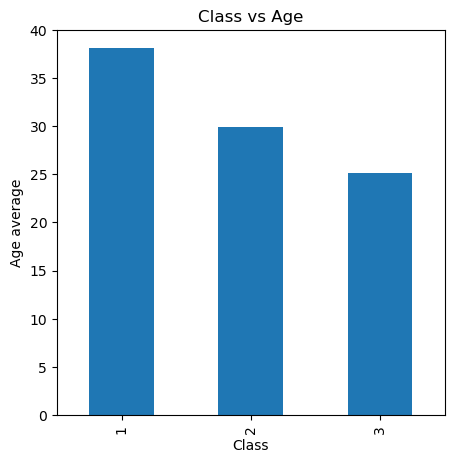

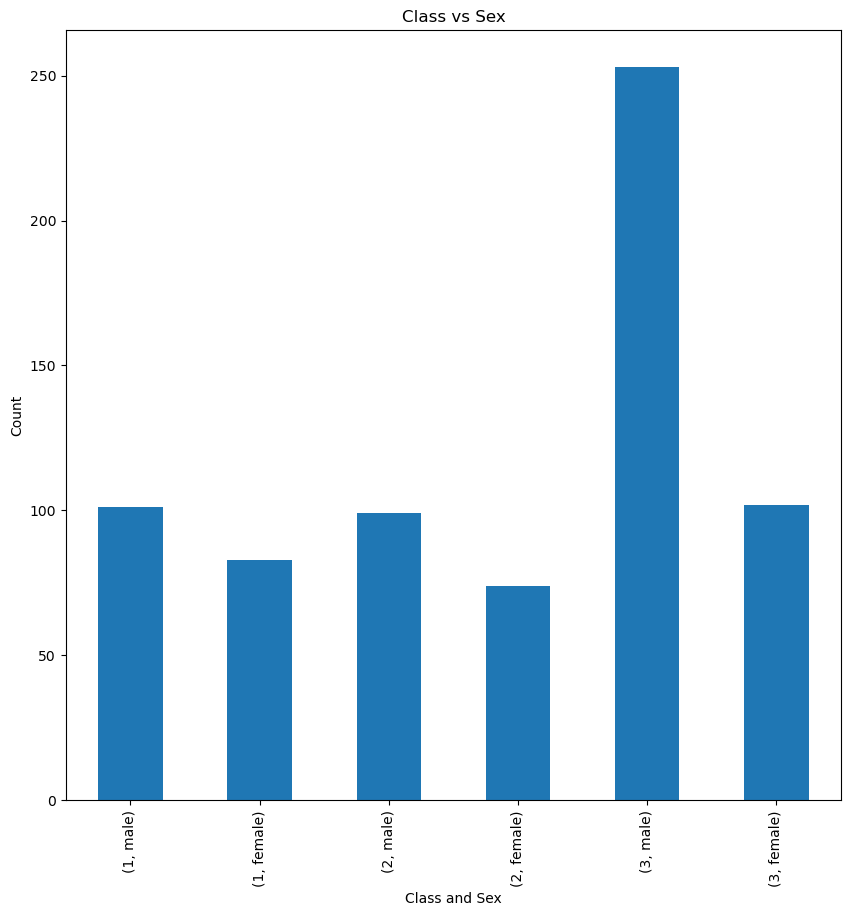

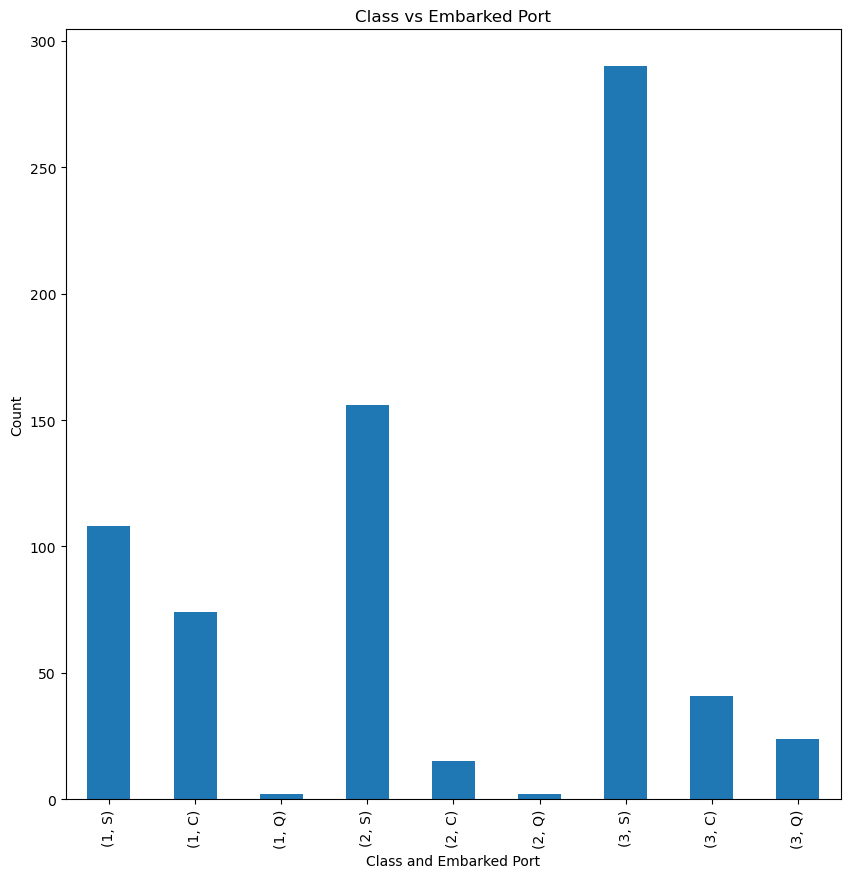

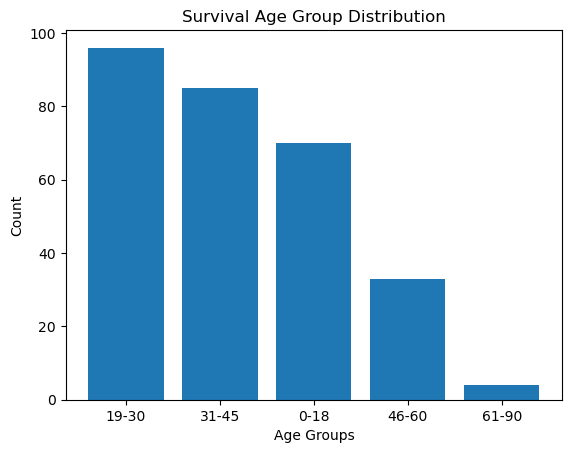

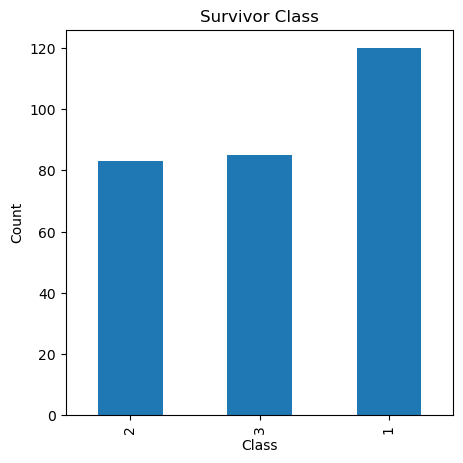

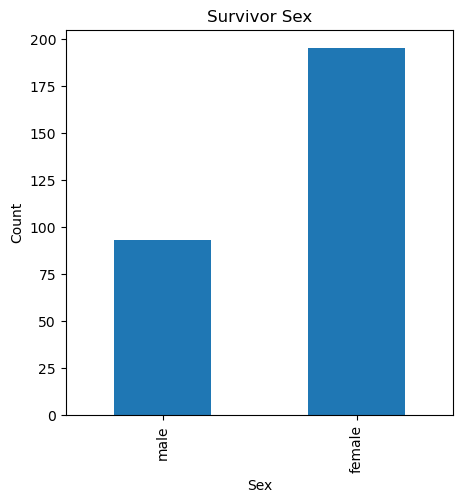

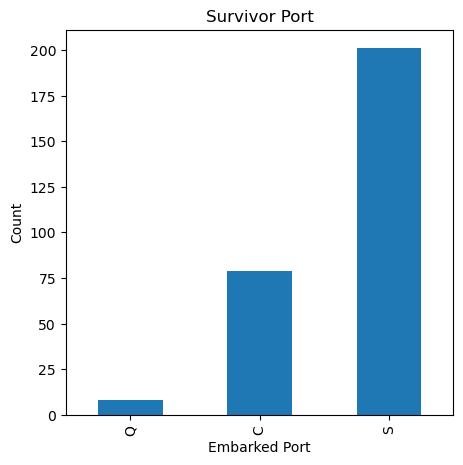

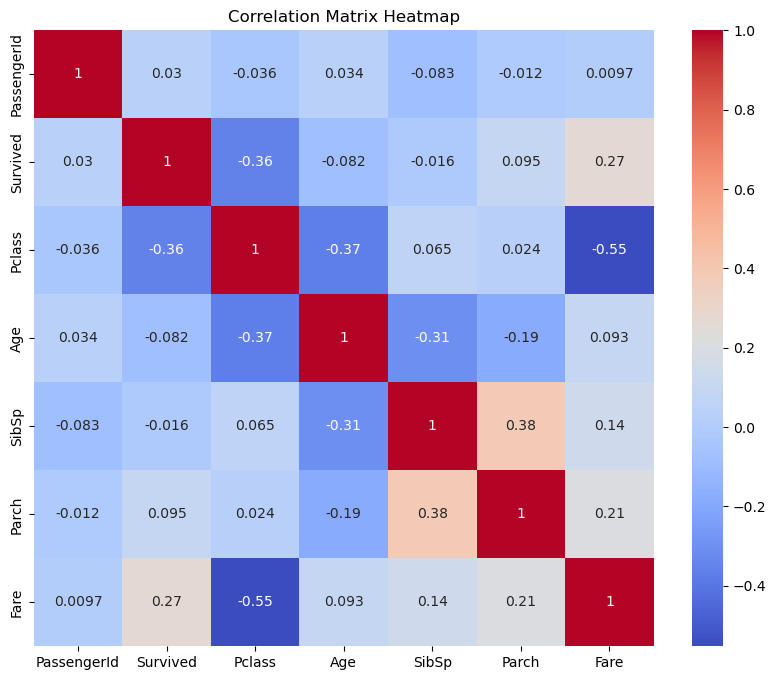

Correlation Between Survival and other Values:

PassengerId    0.029526
Survived       1.000000
Pclass        -0.356462
Age           -0.082446
SibSp         -0.015523
Parch          0.095265
Fare           0.266100
Name: Survived, dtype: float64


In [4]:
##importing everything
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
################################
#PART 1 EDA
titanic_df = pd.read_csv('titanic/train.csv')
titanic_df.info()
# Drop rows where the 'Age' column contains NULL values
titanic_df = titanic_df.dropna(subset=['Age'])
titanic_df = titanic_df.dropna(subset=['Embarked'])
# Drop the 'Cabin' column from the DataFrame since it isn't useful 
titanic_df = titanic_df.drop('Cabin', axis=1)
titanic_df = titanic_df.drop('Name', axis=1)
titanic_df = titanic_df.drop('Ticket', axis=1)
titanic_df.info()
#BULLET POINT 2
#Explore the socio-economic status of the passenger, is there any relationship 
#between socio-economic status with other features, such as age, gender, number 
#of family members on board, etc.
#DISCOVERIES
# I discovered that the majority of rich people are on the older side. This 
# makes sense since younger people are just getting started in their business 
# and it takes time for people to develop their wealth.
class_and_age_df=titanic_df.groupby("Pclass") .agg(Age=("Age",'mean'))
class_and_age_df.Age.plot(kind='bar',figsize=(5,5))
plt.title('Class vs Age')
plt.xlabel('Class')
plt.ylabel('Age average')
plt.show()
# there is way more male lower class citizens on the boat I believe that 
# there are high chances that they are workers for the titanic or are passengers 
# seeking a new life elsewhere. 
class_and_sex_df=titanic_df.groupby("Pclass")["Sex"].value_counts()
class_and_sex_df.plot(kind='bar',figsize=(10,10))
plt.title('Class vs Sex')
plt.xlabel('Class and Sex')
plt.ylabel('Count')
plt.show()
# After plotting we can see that the majority of people came from Southampton 
# and the proportions of higher classes in Southampton is pretty high. But taking 
# a look at Cherbourg the vast majority of people on board there are first class 
# which is something to take into consideration for the future analysis.
class_and_embark_df=titanic_df.groupby("Pclass")["Embarked"].value_counts()
class_and_embark_df.plot(kind='bar',figsize=(10,10))
plt.title('Class vs Embarked Port')
plt.xlabel('Class and Embarked Port')
plt.ylabel('Count')
plt.show()
#BULLET POINT 3
#Explore the distribution of survival victims in relation to age, gender, 
#socioeconomic class, etc. 
survived_df=titanic_df[titanic_df.Survived ==1]
age_groups = pd.cut(survived_df['Age'], bins=[0, 18, 30, 45, 60, 90], labels=['0-18', '19-30', '31-45', '46-60', '61-90'])
age_counts = age_groups.value_counts()
# After Plotting we can see that younger individuals like 0-18 and 19-30 take up 
# most of the survivor list. Meaning which younger individuals were prioritized. 
# But the abundant amount of 31-45 aged individuals were probably from the first 
# class.
plt.bar(age_counts.index, age_counts.values)
plt.title('Survival Age Group Distribution')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()
# As we’ve seen in the economic status vs sex slide that the amount of people in 
# both first and second class is way less than the third class. But the survivor 
# list shows that first class individuals was the most that survived. While the 
# second class matched the third class while being less.
survived_df.Pclass.value_counts().sort_values().plot(kind='bar',figsize=(5,5)) 
plt.title('Survivor Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
# Port was not significant because the difference in port value counts are 
# proportional to the original value counts before sorting by survivor
survived_df.Sex.value_counts().sort_values().plot(kind='bar',figsize=(5,5)) 
plt.title('Survivor Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()
survived_df.Embarked.value_counts().sort_values().plot(kind='bar',figsize=(5,5)) 
plt.title('Survivor Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.show()

#What features seem to be the most important ones? Perform a correlation 
#analysis before your prediction task
#correlation between survival and other values
corr_matrix = titanic_df.corr()
corr_matrix['Survived'].sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix Heatmap')
plt.show()
print("Correlation Between Survival and other Values:\n")
print(corr_matrix['Survived'])
#Pclass: There is a moderate negative correlation between Pclass and Survived, 
#indicating that passengers in higher classes (lower numbers) were more likely 
#to survive than those in lower classes.

#Fare: There is a moderate positive correlation between Fare and Survived, 
#indicating that passengers who paid higher fares were more likely to survive 
#than those who paid lower fares.

#How can you extract information from the non-numerical features?
#Non-numerical features can be converted into numerical features by 
#assigning a unique integer value to each category. For example, in the 
#Titanic dataset, the "Embarked" feature can be encoded as C=0, Q=1, and S=2.
titanic_df["Sex"] = titanic_df["Sex"].replace({"male": 0, "female": 1})
titanic_df["Embarked"] = titanic_df["Embarked"].replace({"C": 0, "Q": 1, "S": 2})
#
# sns.countplot(x='Survived', hue='Sex', data=titanic_df)

In [5]:
# PART 2 Modeling and Question Answering
titanic_df.info()
# Split the dataset into features (x) and target variable (y)
train = titanic_df[titanic_df['PassengerId'] <= 700]
test = titanic_df[titanic_df['PassengerId'] > 700]

x_train = train.drop('Survived', axis=1)
y_train = train['Survived']
x_test = test.drop('Survived', axis=1)

# create the decision tree model
# Decision Tree: It is a tree-based model that works by recursively splitting 
# the data into smaller subsets based on the most important features. 
# The algorithm will create a tree-like structure where each internal node 
# represents a feature, each branch represents a decision rule, and each leaf 
# node represents a prediction.
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

# evaluate the decision tree model
dt_accuracy = accuracy_score(test['Survived'], dt_pred)
dt_precision = precision_score(test['Survived'], dt_pred)
dt_recall = recall_score(test['Survived'], dt_pred)
dt_f1 = f1_score(test['Survived'], dt_pred)
dt_cv = cross_val_score(dt_model, x_train, y_train, cv=10)

print("Accuracy:", dt_accuracy)
print("Precision:",dt_precision)
print("Recall:",dt_recall)
print("F1:",dt_f1)
print("CV:",dt_cv)
#linear regression training model
# Linear regression: It is a statistical approach that models the relationship 
# between a dependent variable and one or more independent variables, assuming 
# that the relationship is linear. In a simple linear regression model, there is 
# only one independent variable, and the goal is to find a line of best fit that 
# describes the relationship between the independent variable and the dependent 
# variable.
train=pd.read_csv('titanic/train.csv')
test=train[train.PassengerId >=700]

train=train.drop('Name',axis=1)
train=train.drop('Cabin',axis=1)
train=train.drop('Ticket',axis=1)
train=train.drop('PassengerId',axis=1)
train["Sex"] = train["Sex"].replace({"male": 0, "female": 1})
train["Embarked"] = train["Embarked"].replace({"C": 0, "Q": 1, "S": 2})
train=train.dropna()


df_train_x=train.drop('Survived',axis=1)
df_train_y=train['Survived']
dt_model=LinearRegression()
regression=dt_model.fit(df_train_x,df_train_y)

test=test.drop('Name',axis=1)
test=test.drop('Cabin',axis=1)
test=test.drop('Ticket',axis=1)
test=test.drop('PassengerId',axis=1)
test["Sex"] = test["Sex"].replace({"male": 0, "female": 1})
test["Embarked"] = test["Embarked"].replace({"C": 0, "Q": 1, "S": 2})
test=test.dropna()

df_test_x=test.drop('Survived',axis=1)
prediction=regression.predict(df_test_x)
prediction=prediction.round(0)
print("prediction: ",prediction)

# evaluate the linear regression model
dt_accuracy = accuracy_score(test['Survived'], prediction)
dt_precision = precision_score(test['Survived'], prediction)
dt_recall = recall_score(test['Survived'], prediction)
dt_f1 = f1_score(test['Survived'], prediction)
dt_cv = cross_val_score(dt_model, df_train_x, df_train_y, cv=10)

print("Accuracy:", dt_accuracy)
print("Precision:",dt_precision)
print("Recall:",dt_recall)
print("F1:",dt_f1)
print("CV:",dt_cv)

#logistic training model
# Logistic Regression: It is a statistical model that uses a logistic function 
# to model a binary dependent variable. In our case, the dependent variable is 
# the survival rate (0 or 1). The algorithm will try to find the best fitting 
# logistic function that can predict the probability of survival based on the 
# independent variables.
train_x=train[["Pclass","Sex","Embarked"]]
train_y=train['Survived']
dt_model=LogisticRegression()
regression=dt_model.fit(train_x,train_y)

test_x=test[["Pclass","Sex","Embarked"]]

prediction= regression.predict(test_x)
print(prediction)
# evaluate the logistic training model
dt_accuracy = accuracy_score(test['Survived'], prediction)
dt_precision = precision_score(test['Survived'], prediction)
dt_recall = recall_score(test['Survived'], prediction)
dt_f1 = f1_score(test['Survived'], prediction)
dt_cv = cross_val_score(dt_model, train_x, train_y, cv=10)

print("Accuracy:", dt_accuracy)
print("Precision:",dt_precision)
print("Recall:",dt_recall)
print("F1:",dt_f1)
print("CV:",dt_cv)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    int64  
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 55.6 KB
Accuracy: 0.8037974683544303
Precision: 0.7538461538461538
Recall: 0.765625
F1: 0.7596899224806202
CV: [0.66071429 0.71428571 0.42857143 0.51785714 0.6        0.83636364
 0.78181818 0.67272727 0.81818182 0.8       ]
prediction:  [ 0.  1.  0.  1.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  1.  1.  0.
  1.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.
  0.  0.